## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data understanding

In [45]:
# Importing relevant libraries
import pandas as pd

In [46]:
kc_data= pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [47]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset has 21 columns;6 categorical and 15 numerical columns. Some of the colums has missing values.

In [48]:
#checking for rows and columns of the dataset
kc_data.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [49]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront,view and year renovated have missing values.View and waterfront are categorical columns so we'll replace the missing values with the mode and year renovated ,which is a numerical column, we'll replace the missing values with the median, not the mean, to avoid skewing the data.

In [50]:
kc_data.duplicated().sum()

0

There are no duplicates in the data.

In [51]:
for column in kc_data.columns:
    # Print the column name
    print("Value counts for {} column:".format(column))
    # Print the value counts for the column
    print(kc_data[column].value_counts())
    # Add a separator for clarity
    print("="*30)

Value counts for id column:
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
Value counts for date column:
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64
Value counts for price column:
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64
Value counts for bedrooms column:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Value counts for bathrooms column:
2.50    5377
1.00    3851


The square foot basement column has a placeholder value,?.

# Data cleaning

In [52]:
kc_data[kc_data['bedrooms']> 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


When the number of bedrooms is 33, the value in the sqft_living and sqft_lot a too little to match to that record meaning there is most likely an error in data entry. Therefore it`s best drop that column

In [53]:
kc_data = kc_data.drop(kc_data[kc_data['bedrooms'] > 20].index)

In [54]:
#defining a simple function to check the percentage of missing values per column
def missing_values(data):
    total=len(data)
    missing_value =data.isna().sum()
    percentage_missing= (missing_value/total)*100
    return percentage_missing

missing_values(kc_data)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.002037
view              0.291721
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.790332
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

* waterfront missing values constitute, 11.00152798999861 % of the entire column
* view missing values constitute, 0.29170718155299347 % of the entire column
* year renovated missing values constitute, 17.78950780200954 % of the entire column

Since the missing values in the 3 columns are categorical and are a small percentage of the columns, replacing them with mode won`t skew the data nor give false conclusions

In [55]:
#checking the mode for the waterfront column
kc_data['waterfront'].mode()

0    NO
Name: waterfront, dtype: object

In [56]:
#watefront; The mode is NO 
kc_data['waterfront'] = kc_data['waterfront'].fillna(kc_data['waterfront'].mode()[0])
kc_data['waterfront'].isna().sum()

0

In [57]:
kc_data['view'].mode()

0    NONE
Name: view, dtype: object

In [58]:
#view; The mode is NONE
kc_data['view'] = kc_data['view'].fillna(kc_data['view'].mode()[0])
kc_data['view'].isna().sum()

0

In [59]:
#Checking the mode of the year renovated column
kc_data['yr_renovated'].mode()

0    0.0
Name: yr_renovated, dtype: float64

In [60]:
#year renovated mode is 0
kc_data['yr_renovated'] = kc_data['yr_renovated'].fillna(kc_data['yr_renovated'].mode()[0])
kc_data['yr_renovated'].isna().sum()

0

In [61]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  object 
 9   view           21596 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   21596 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

In [62]:
#checking for outliers
import matplotlib.pyplot as plt
def check_for_outliers(data, column):
    # Create a box plot of the column data
    plt.boxplot(data[column])
    plt.title("Box plot for {}".format(column))
    plt.show()

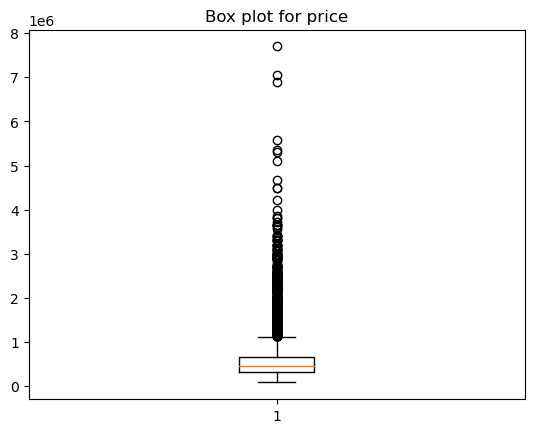

In [63]:
check_for_outliers(kc_data, 'price')

The data has outliers but we cannot eliminate the outliers because they actually provide valuable information

Dealing with the placeholder values in squarefoot basement
* It has 454 placeholder values, dropping the would mean loss of valuable data in the other columns
* The placeholder would have most likely have been used to show that the house has no basement, we can therefore replace these placeholder values with the mode ie 0
* The placeholder values constitute 2% of the column so imputing the data won't skew the data

In [64]:
print ('square foot basement placeholder values ? constitute,',(454/21597)*100, '% of the entire column')

kc_data['sqft_basement'].replace('?',0.0,regex=False,inplace=True)
kc_data['sqft_basement'].value_counts()

square foot basement placeholder values ? constitute, 2.1021438162707784 % of the entire column


0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [65]:
#changing the data type of the column because it contains numerical values
kc_data['sqft_basement']=kc_data['sqft_basement'].astype(float)


In [66]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  object 
 9   view           21596 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   21596 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

The data doesn't have missing values, duplicates or placeholder values and all the columns are in their correct datatypes

In [67]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,1788.631506,285.702954,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,827.763251,439.825454,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
